<a href="https://colab.research.google.com/github/carlhernandez0/Skyline-Math-200/blob/main/Research_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import researchpy as rp

In [4]:
import pandas as pd
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


In [5]:
df['H4SP1H'].value_counts()

6     1582
      1390
7     1078
5     1007
8      406
4      309
9      261
10     139
3       95
11      72
12      64
2       48
1       40
98      12
96       1
Name: H4SP1H, dtype: int64

In [6]:
df['Hour_wake_up'] = df['H4SP1H']
df['Hour_wake_up']= pd.to_numeric(df['Hour_wake_up'],errors= 'coerce')
df['Hour_wake_up']= df['Hour_wake_up'].loc[df['Hour_wake_up'] < 96]
df['Hour_wake_up']= df['Hour_wake_up'].loc[df['Hour_wake_up'] != ' ']
df['Hour_wake_up'].value_counts()

6.0     1582
7.0     1078
5.0     1007
8.0      406
4.0      309
9.0      261
10.0     139
3.0       95
11.0      72
12.0      64
2.0       48
1.0       40
Name: Hour_wake_up, dtype: int64

In [7]:
df['H4SP1M'].value_counts()

0     2776
30    1599
      1390
45     306
15     206
20      46
40      34
3       33
50      30
10      15
98      13
25      10
55       9
1        8
35       8
5        8
7        2
43       1
96       1
24       1
6        1
32       1
44       1
59       1
12       1
9        1
54       1
2        1
Name: H4SP1M, dtype: int64

In [8]:
df['Minutes_wake_up'] = df['H4SP1M']
df['Minutes_wake_up']= pd.to_numeric(df['Minutes_wake_up'],errors= 'coerce')
df['Minutes_wake_up']= df['Minutes_wake_up'].loc[df['Minutes_wake_up'] < 96]
df['Minutes_wake_up']= df['Minutes_wake_up'].loc[df['Minutes_wake_up'] != ' ']
df['Minutes_wake_up'].value_counts()

0.0     2776
30.0    1599
45.0     306
15.0     206
20.0      46
40.0      34
3.0       33
50.0      30
10.0      15
25.0      10
55.0       9
1.0        8
35.0       8
5.0        8
7.0        2
43.0       1
24.0       1
6.0        1
32.0       1
44.0       1
59.0       1
12.0       1
9.0        1
54.0       1
2.0        1
Name: Minutes_wake_up, dtype: int64

In [9]:
df['H4SP1T'].value_counts()

1    4843
     1390
2     258
8      12
6       1
Name: H4SP1T, dtype: int64

In [10]:
df['AM_PM_Wake']=df['H4SP1T']
df['AM_PM_Wake'] = df['AM_PM_Wake'].loc[df['AM_PM_Wake'] !=' ']
df['AM_PM_Wake'] = df['AM_PM_Wake'].loc[df['AM_PM_Wake'] <'6']
df['AM_PM_Wake'].replace(['1','2'],['AM','PM'],inplace=True)
df['AM_PM_Wake'].value_counts()

AM    4843
PM     258
Name: AM_PM_Wake, dtype: int64

In [11]:
df_time_convert= df[['AM_PM_Wake','Hour_wake_up','Minutes_wake_up']]

In [12]:
df_time_convert.dropna(inplace=True)

<ipython-input-12-9f90cf800d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [13]:
df_time_convert

,AM_PM_Wake,Hour_wake_up,Minutes_wake_up
1,AM,6.0,0.0
3,AM,9.0,0.0
7,AM,6.0,30.0
9,AM,9.0,30.0
11,AM,5.0,0.0
...,...,...,...
6499,AM,7.0,45.0
6500,AM,7.0,0.0
6501,AM,5.0,30.0
6502,AM,8.0,2.0


In [14]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [15]:
df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['Hour_wake_up'],x['Minutes_wake_up'],x['AM_PM_Wake']),axis = 1)
df_time_convert

<ipython-input-15-e5ac72639172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['Hour_wake_up'],x['Minutes_wake_up'],x['AM_PM_Wake']),axis = 1)


,AM_PM_Wake,Hour_wake_up,Minutes_wake_up,Time Value (float)
1,AM,6.0,0.0,6.000000
3,AM,9.0,0.0,9.000000
7,AM,6.0,30.0,6.500000
9,AM,9.0,30.0,9.500000
11,AM,5.0,0.0,5.000000
...,...,...,...,...
6499,AM,7.0,45.0,7.750000
6500,AM,7.0,0.0,7.000000
6501,AM,5.0,30.0,5.500000
6502,AM,8.0,2.0,8.033333


In [16]:
df= df.assign(military_wake_up = df_time_convert['Time Value (float)'])
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,Hour_wake_up,Minutes_wake_up,AM_PM_Wake,military_wake_up
0,5710027,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,2,1,6.0,0.0,AM,6.000000
2,5710317,1,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,4,1,9.0,0.0,AM,9.000000
4,5710455,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,0,4,2,7.0,45.0,AM,7.750000
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,0,3,2,7.0,0.0,AM,7.000000
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,1,0,0,0,4,3,5.0,30.0,AM,5.500000
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,0,3,2,8.0,2.0,AM,8.033333


In [17]:
df['AM_PM_Wake']

0       NaN
1        AM
2       NaN
3        AM
4       NaN
       ... 
6499     AM
6500     AM
6501     AM
6502     AM
6503     AM
Name: AM_PM_Wake, Length: 6504, dtype: object

In [18]:
df['military_wake_up']

0            NaN
1       6.000000
2            NaN
3       9.000000
4            NaN
          ...   
6499    7.750000
6500    7.000000
6501    5.500000
6502    8.033333
6503    5.250000
Name: military_wake_up, Length: 6504, dtype: float64

In [20]:
rp.summary_cont(df['military_wake_up'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,military_wake_up,5100.0,6.8727,2.6117,0.0366,6.801,6.9443


In [21]:
df['military_wake_up'].agg(['mean','median','std']).round(2)

mean      6.87
median    6.50
std       2.61
Name: military_wake_up, dtype: float64

In [22]:
df['military_wake_up'].describe()

count    5100.000000
mean        6.872650
std         2.611656
min         0.000000
25%         5.500000
50%         6.500000
75%         7.500000
max        23.500000
Name: military_wake_up, dtype: float64

<Axes: xlabel='military_wake_up', ylabel='Count'>

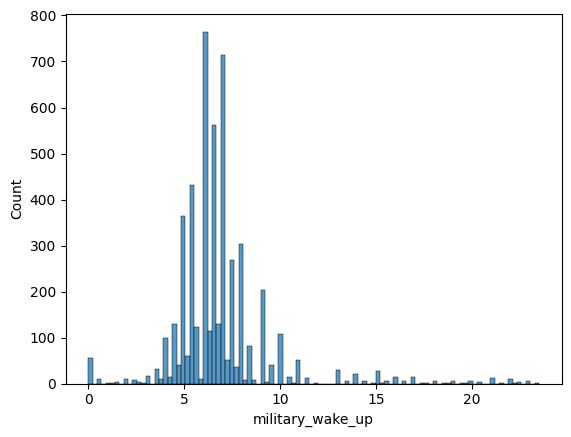

In [23]:
sns.histplot(x = 'military_wake_up', data =df)

<Axes: xlabel='military_wake_up'>

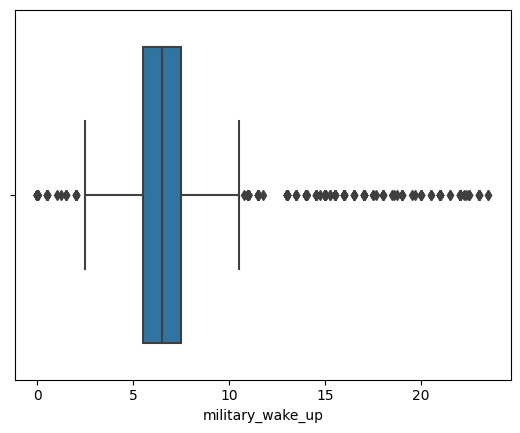

In [24]:
sns.boxplot(x = 'military_wake_up', data =df)

In [25]:
df['H4RE11'].value_counts()

     1390
4    1359
0    1066
3    1020
2     994
1     660
6      12
8       3
Name: H4RE11, dtype: int64

In [26]:
df['religion_personal_use'] = df['H4RE11']
df['religion_personal_use'].value_counts()

     1390
4    1359
0    1066
3    1020
2     994
1     660
6      12
8       3
Name: religion_personal_use, dtype: int64

In [27]:
df['religion_personal_use'] = df['religion_personal_use'].loc[ df['religion_personal_use'] !=' ']
   
df['religion_personal_use'].value_counts()

4    1359
0    1066
3    1020
2     994
1     660
6      12
8       3
Name: religion_personal_use, dtype: int64

In [28]:
df['religion_personal_use'] = df['religion_personal_use'].loc[ df['religion_personal_use'] !='6']
df['religion_personal_use'] = df['religion_personal_use'].loc[ df['religion_personal_use'] !='8']
df['religion_personal_use'].value_counts()

4    1359
0    1066
3    1020
2     994
1     660
Name: religion_personal_use, dtype: int64

In [29]:
df['religion_personal_use'].replace(['0','1','2','3','4'], ['NEVER', 'SELDOM', 'SOMETIMES', 'OFTEN', 'VERY OFTEN'], inplace = True)
df['religion_personal_use'].value_counts()

VERY OFTEN    1359
NEVER         1066
OFTEN         1020
SOMETIMES      994
SELDOM         660
Name: religion_personal_use, dtype: int64

<Axes: ylabel='religion_personal_use'>

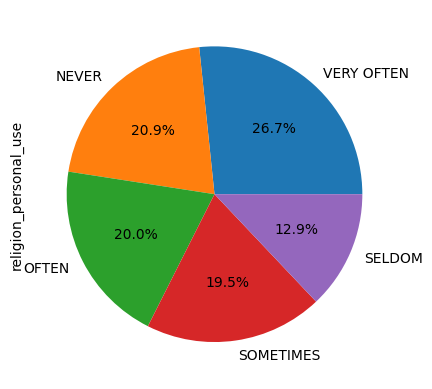

In [31]:
df['religion_personal_use'].value_counts().plot(kind ='pie', autopct='%1.1f%%')

In [30]:
rp.summary_cat(df['religion_personal_use'])

,Variable,Outcome,Count,Percent
0,religion_personal_use,VERY OFTEN,1359,26.65
1,,NEVER,1066,20.91
2,,OFTEN,1020,20.00
3,,SOMETIMES,994,19.49
4,,SELDOM,660,12.94


In [32]:
df.groupby('religion_personal_use')['military_wake_up'].agg(['mean','std']).round(2)

,mean,std
religion_personal_use,,
NEVER,6.96,2.57
OFTEN,6.96,2.64
SELDOM,6.91,2.89
SOMETIMES,6.88,2.61
VERY OFTEN,6.71,2.46


<Axes: xlabel='military_wake_up', ylabel='religion_personal_use'>

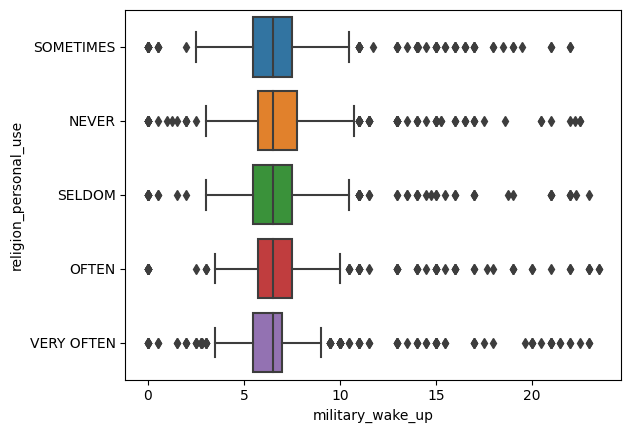

In [33]:
sns.boxplot(y = 'religion_personal_use' , x ='military_wake_up' , data = df)

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
model = ols('military_wake_up ~ C(religion_personal_use)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(religion_personal_use),4.0,52.845789,13.211447,1.945533,0.100069
Residual,5080.0,34496.537547,6.790657,NaN,NaN


In [36]:
import statsmodels.stats.multicomp as multi


In [37]:
sub = df[['military_wake_up','religion_personal_use']].dropna() 
mc1 = multi.MultiComparison(sub['military_wake_up'], sub['religion_personal_use'])
res = mc1.tukeyhsd()
print(res.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
    NEVER      OFTEN  -0.0022    1.0 -0.3138 0.3094  False
    NEVER     SELDOM  -0.0509  0.995  -0.404 0.3023  False
    NEVER  SOMETIMES  -0.0769 0.9631 -0.3909 0.2371  False
    NEVER VERY OFTEN  -0.2511 0.1287 -0.5423 0.0401  False
    OFTEN     SELDOM  -0.0487 0.9959 -0.4048 0.3073  False
    OFTEN  SOMETIMES  -0.0748 0.9679  -0.392 0.2425  False
    OFTEN VERY OFTEN  -0.2489 0.1434 -0.5437 0.0458  False
   SELDOM  SOMETIMES  -0.0261 0.9997 -0.3842 0.3321  False
   SELDOM VERY OFTEN  -0.2002 0.4879 -0.5386 0.1381  False
SOMETIMES VERY OFTEN  -0.1742 0.4982 -0.4714 0.1231  False
----------------------------------------------------------


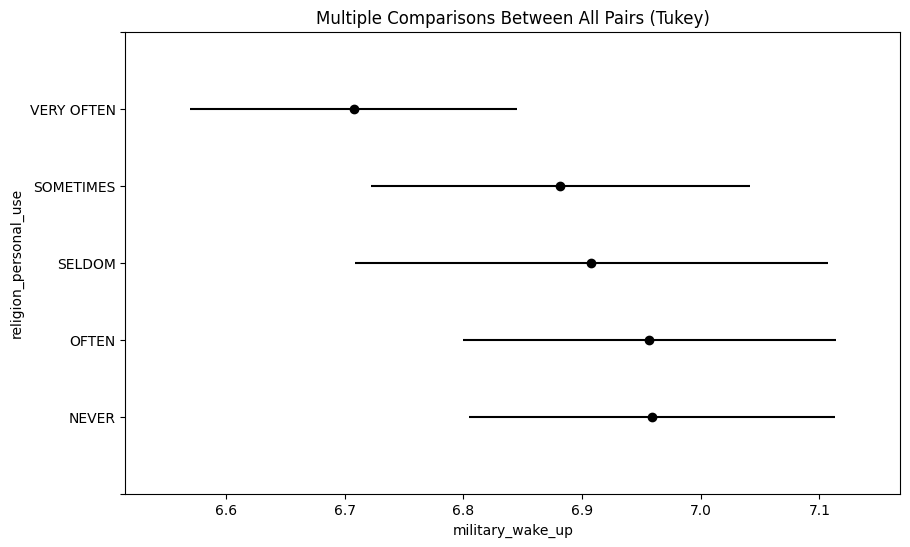

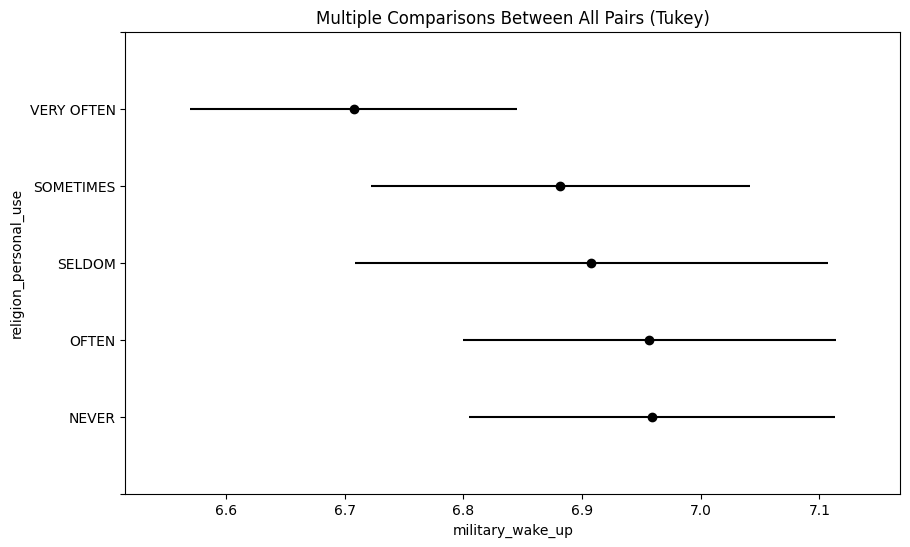

In [41]:
res.plot_simultaneous(ylabel= "religion_personal_use", xlabel= "military_wake_up")